# Using Data Visualization for Problem Solving

Working in small groups, help Ann figure out what's been going on with her recent Polymerase Chain Reactions (PCR). She has pointed you to a database with both her experiments and those of a colleague, Robert.

**You will attempt to answer** (Please add headers where you are answering these questions):
1. What is the most likely issue? How do you know?
2. When did the issue start?
3. How can we fix the issue?

## What do YOU need to know about PCR Reactions?


*   PCR is a process of increasing the amount of DNA in a sample.
* Theoretically, our product should double for every "cycle" of PCR
  * Biological reactions hardly ever work 100% perfectly. Overall cycle-to-cycle efficiency of the PCR Reaction can be estimated as: $E = (\frac{\mbox{final amount of DNA}}{\mbox{starting amount of DNA}})^{\frac{\large{1}}{\mbox{# cycles}}}$
*   PCR is temperature-dependent, and the heating and cooling is done on PCR Machines.
  * These machines use electrical elements to heat, and sometimes these elements break.
  * The PCR machines Ann is using have two heating elements per plate.
* PCR requires specific chemicals in each reaction to work properly.
  * Ann and Robert make these chemical mixes on a per-plate, or per-sample replicate basis. Either Ann or Robert might occasionally forget to add some necessary chemicals.
  * Both Ann and Robert are in the habit of placing similar samples vertically on the plate.
* Ann runs her PCR reactions in individual wells of a PCR Plate.
  * Plate layout: Rows are A-H, Columns are 1-12.
  * Ex. The well C3 is at the intersection of the third row (C), and the third column (3)


[Quick PCR Video](https://www.youtube.com/watch?v=VD5qEVTsjTc)

##The amount of DNA doubles each cycle

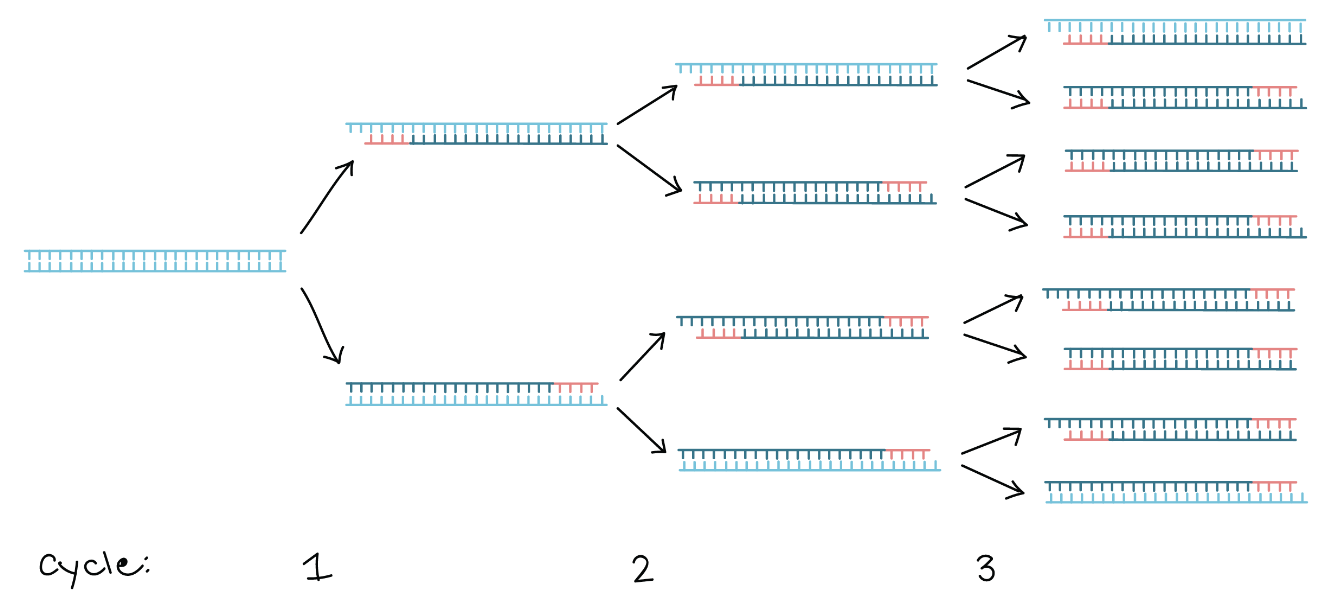

## PCR Plate Layout

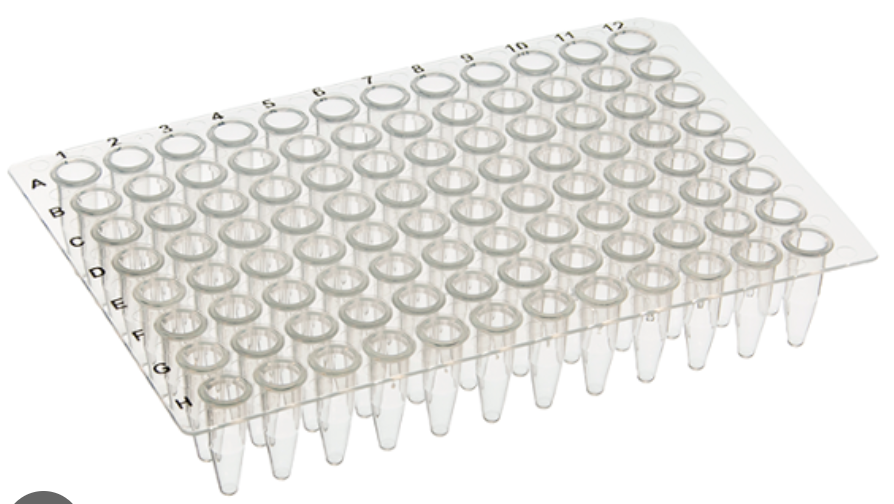

##Columns in the data

`Well`: The well position in the plate layout

`Starting_Product_(ng)`: The amount of DNA to start the reaction

`Final_Product_(ug)`: The amount of DNA at the end of the reaction. **Note: The units are different. There are 1000ng in 1 ug.**

`PCR_Machine`: Which instrument was used (there are 2 PCR machines)

`Date`: The date the experiment takes place

`Sample ID`: The description of the sample. Samples with "Reamplify", or "Reamp" are starting from PCR product, "gDNA" is starting from genomic DNA.

`User ID`: Which person set up and ran the PCR reaction

`Plate ID`: The plate used. Plate IDs are unique to each PCR reaction.

`Cycles`: The number of cycles of PCR. (How many times we're increasing the product amount)

The URL for the data is: https://docs.google.com/spreadsheets/d/15_LFkPBY7Amroyy32g0AXoUV1YuqqQI2RZfaHWrnxQA/export?format=csv

## Group Members Here:

Names

In [ ]:
# Your Code Here... Please layout your logic, using text cells where needed.

In [ ]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/15_LFkPBY7Amroyy32g0AXoUV1YuqqQI2RZfaHWrnxQA/export?format=csv')
df.head()

,Well,Starting_Product_(ng),Final_Product_(ug),PCR_Machine,Date,Sample ID,User ID,Plate ID,Cycles
0,A1,10.0,0.619747,1,10-13-23,Reamplify_Exp_30_10ng_rep1,Ann,Plate_319,8
1,B1,10.0,0.474593,1,10-13-23,Reamplify_Exp_30_10ng_rep1,Ann,Plate_319,8
2,C1,10.0,0.950488,1,10-13-23,Reamplify_Exp_30_10ng_rep1,Ann,Plate_319,8
3,D1,10.0,0.501590,1,10-13-23,Reamplify_Exp_30_10ng_rep1,Ann,Plate_319,8
4,E1,10.0,1.246728,1,10-13-23,Reamplify_Exp_30_10ng_rep1,Ann,Plate_319,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Well                   576 non-null    object 
 1   Starting_Product_(ng)  564 non-null    float64
 2   Final_Product_(ug)     576 non-null    float64
 3   PCR_Machine            576 non-null    int64  
 4   Date                   576 non-null    object 
 5   Sample ID              576 non-null    object 
 6   User ID                576 non-null    object 
 7   Plate ID               576 non-null    object 
 8   Cycles                 576 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 40.6+ KB


In [ ]:
df.describe()

,Starting_Product_(ng),Final_Product_(ug),PCR_Machine,Cycles
count,564.000000,576.000000,576.000000,576.000000
mean,363.829787,18.366083,1.333333,15.333333
std,396.597715,38.410088,0.471814,10.379914
min,10.000000,0.000000,1.000000,8.000000
25%,100.000000,0.494397,1.000000,8.000000
50%,100.000000,1.157312,1.000000,8.000000
75%,1000.000000,8.942421,2.000000,30.000000
max,1000.000000,168.617673,2.000000,30.000000


In [ ]:
df.columns

Index(['Well', 'Starting_Product_(ng)', 'Final_Product_(ug)', 'PCR_Machine',
       'Date', 'Sample ID', 'User ID', 'Plate ID', 'Cycles'],
      dtype='object')

In [ ]:
df['Final_Product_(ng)'] = df['Final_Product_(ug)'] * 1000

In [ ]:
df[df['Starting_Product_(ng)'] == 1000][['Final_Product_(ng)', 'Cycles']].corr()
# thats bizarre, final product volume should grow if the amount of dna doubles every cycle

,Final_Product_(ng),Cycles
Final_Product_(ng),1.0,NaN
Cycles,NaN,NaN


<Axes: >

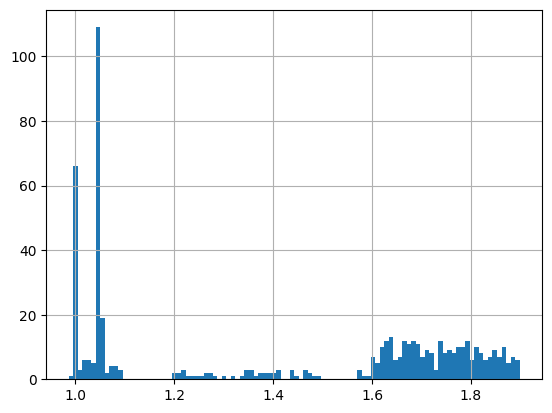

In [ ]:
def calculate_eff(entry):
    return pow(entry['Final_Product_(ng)'] / entry['Starting_Product_(ng)'], 1 / entry['Cycles'])

df['efficiency'] = df.apply(calculate_eff, axis=1)
df['efficiency'].hist(bins=100)

In [ ]:
# should not be more than 100% efficient

In [ ]:
import seaborn as sns

<Axes: xlabel='efficiency'>

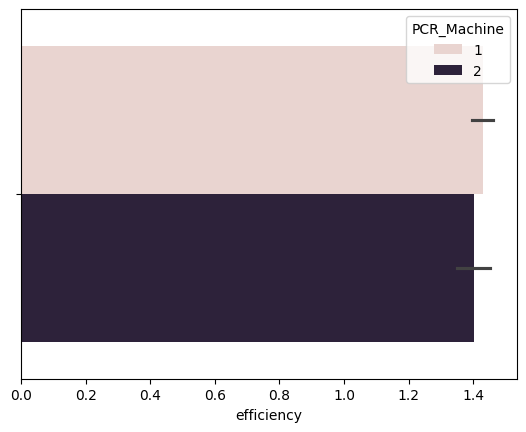

In [ ]:
sns.barplot(data=df, x ='efficiency', hue= 'PCR_Machine')

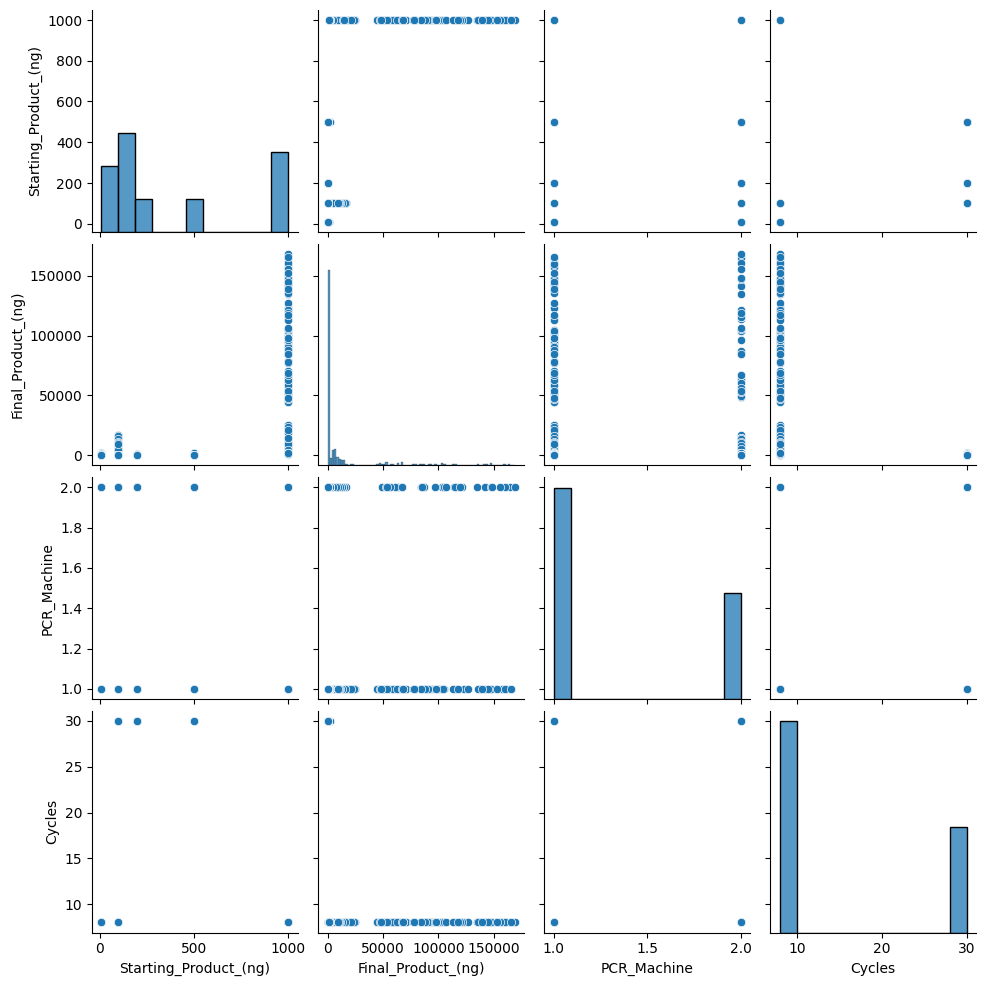

In [ ]:
sns.pairplot(df[['Starting_Product_(ng)', 'Final_Product_(ng)', 'PCR_Machine', 'Cycles']])

<Axes: xlabel='Starting_Product_(ng)', ylabel='Final_Product_(ng)'>

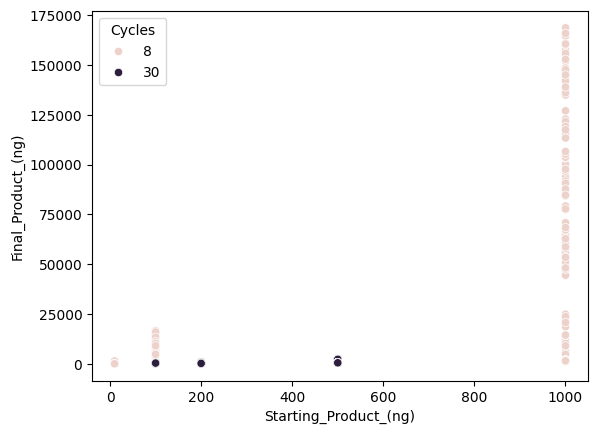

In [ ]:
sns.scatterplot(data=df, x='Starting_Product_(ng)', y='Final_Product_(ng)', hue='Cycles')

In [ ]:
# It seems as there is no correlation between the amount of start and end product which makes no sense

In [ ]:
df[df['efficiency'] < 1]['User ID'].value_counts()

User ID
Robert    14
Ann        3
Name: count, dtype: int64

In [ ]:
df[df['efficiency'] < 1]

,Well,Starting_Product_(ng),Final_Product_(ug),PCR_Machine,Date,Sample ID,User ID,Plate ID,Cycles,Final_Product_(ng),efficiency
208,A3,100.0,0.099587,2,10-18-23,gDNA_samp_6,Robert,Plate_324,30,99.587146,0.999862
237,F6,200.0,0.193464,2,10-18-23,gDNA_samp_6,Robert,Plate_324,30,193.464200,0.998893
268,E10,500.0,0.499930,2,10-18-23,gDNA_samp_6,Robert,Plate_324,30,499.930191,0.999995
269,F10,500.0,0.498005,2,10-18-23,gDNA_samp_6,Robert,Plate_324,30,498.005198,0.999867
432,A7,10.0,0.008946,1,10-23-23,Reamplify_Exp_41_10ng_rep3,Ann,Plate_336,8,8.946336,0.986179
433,B7,10.0,0.009730,1,10-23-23,Reamplify_Exp_41_10ng_rep3,Ann,Plate_336,8,9.729844,0.996582
436,E7,10.0,0.009778,1,10-23-23,Reamplify_Exp_41_10ng_rep3,Ann,Plate_336,8,9.777822,0.997195
489,B2,100.0,0.096539,1,10-20-23,gDNA_samp_14,Robert,Plate_327,30,96.539471,0.998827
490,C2,100.0,0.099612,1,10-20-23,gDNA_samp_14,Robert,Plate_327,30,99.612277,0.999871
521,B6,200.0,0.190712,1,10-20-23,gDNA_samp_14,Robert,Plate_327,30,190.712302,0.998416


In [ ]:
thou = df[df['Starting_Product_(ng)'] == 1000]
thou

,Well,Starting_Product_(ng),Final_Product_(ug),PCR_Machine,Date,Sample ID,User ID,Plate ID,Cycles,Final_Product_(ng),efficiency
16,A3,1000.0,94.315401,1,10-13-23,Reamplify_Exp_30_1000ng_rep1,Ann,Plate_319,8,94315.401220,1.765318
17,B3,1000.0,51.585001,1,10-13-23,Reamplify_Exp_30_1000ng_rep1,Ann,Plate_319,8,51585.001190,1.637063
18,C3,1000.0,93.565349,1,10-13-23,Reamplify_Exp_30_1000ng_rep1,Ann,Plate_319,8,93565.348580,1.763557
19,D3,1000.0,91.733904,1,10-13-23,Reamplify_Exp_30_1000ng_rep1,Ann,Plate_319,8,91733.903790,1.759204
20,E3,1000.0,157.521791,1,10-13-23,Reamplify_Exp_30_1000ng_rep1,Ann,Plate_319,8,157521.791100,1.882208
...,...,...,...,...,...,...,...,...,...,...,...
475,D12,1000.0,1.238338,1,10-23-23,Reamplify_Exp_43_1000ng_rep2,Ann,Plate_336,8,1238.337648,1.027081
476,E12,1000.0,1.806463,1,10-23-23,Reamplify_Exp_43_1000ng_rep2,Ann,Plate_336,8,1806.463192,1.076722
477,F12,1000.0,1.852245,1,10-23-23,Reamplify_Exp_43_1000ng_rep2,Ann,Plate_336,8,1852.245308,1.080096
478,G12,1000.0,1.346215,1,10-23-23,Reamplify_Exp_43_1000ng_rep2,Ann,Plate_336,8,1346.214836,1.037861


In [ ]:
df.groupby('Plate ID')['efficiency'].mean()

Plate ID
Plate_319    1.740816
Plate_323    1.740211
Plate_324    1.040331
Plate_325    1.541780
Plate_327    1.018117
Plate_336    1.386807
Name: efficiency, dtype: float64

In [ ]:
df.groupby('Date')['efficiency'].mean()

Date
10-13-23    1.740816
10-17-23    1.740211
10-18-23    1.299143
10-20-23    1.018117
10-23-23    1.386807
Name: efficiency, dtype: float64

In [ ]:
df.groupby('User ID')['efficiency'].mean()

User ID
Ann       1.602404
Robert    1.029224
Name: efficiency, dtype: float64

In [ ]:
df.groupby('Sample ID')['efficiency'].mean().sort_values()

Sample ID
gDNA_samp_14                    1.000258
gDNA_samp_6                     1.000400
gDNA_samp_16                    1.001862
gDNA_samp_17                    1.015043
gDNA_samp_20                    1.015121
                                  ...   
Reamplify_Exp_31_1000ng_rep1    1.774499
Reamplify_Exp_41_100ng_rep1     1.776039
Reamplify_Exp_32_1000ng_rep2    1.782050
Reamplify_Exp_30_100ng_rep3     1.799028
empty                                NaN
Name: efficiency, Length: 69, dtype: float64

In [ ]:
# I am not sure why, but all samples have efficiency more than 100%
# It implies that either starting mass, final mass, or number of cycles is incorrect
# I could not establish any correlations

In [ ]:
# What is the most likely issue? How do you know?
# I think either data was entered wrong, or different scales were used to measure
# starting and final mass. In this case one might be correct, and the other is off

In [ ]:
# When did the issue start?

In [ ]:
df[df['efficiency'] > 1].Date.value_counts()

Date
10-18-23    182
10-13-23     96
10-17-23     96
10-23-23     93
10-20-23     80
Name: count, dtype: int64

In [ ]:
df[df['efficiency'] <= 1].Date.value_counts()

Date
10-20-23    10
10-18-23     4
10-23-23     3
Name: count, dtype: int64

In [ ]:
# Not sure

In [ ]:
# How can we fix the issue?
# Ensure that the scales are calibrated. Use the same scale for starting and final masses.